# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('data/cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10351 non-null  int64  
 1   App             10351 non-null  object 
 2   Category        10351 non-null  object 
 3   Rating          10351 non-null  float64
 4   Reviews         10351 non-null  float64
 5   Size            10351 non-null  float64
 6   Installs        10351 non-null  int64  
 7   Content Rating  10351 non-null  object 
 8   Genres          10351 non-null  object 
 9   Month           10351 non-null  float64
 10  is_free         10351 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 889.7+ KB


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Content Rating,Genres,Month,is_free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.00000,10000,Everyone,Art & Design,1.0,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.00000,500000,Everyone,Art & Design;Pretend Play,1.0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.70000,5000000,Everyone,Art & Design,8.0,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.00000,50000000,Teen,Art & Design,6.0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.80000,100000,Everyone,Art & Design;Creativity,6.0,1
...,...,...,...,...,...,...,...,...,...,...
10346,"Mathway: Scan Photos, Solve Problems",EDUCATION,4.6,105363.0,31.00000,10000000,Everyone,Education,2.0,1
10347,"Avast Antivirus – Scan & Remove Virus, Cleaner",TOOLS,4.7,165252.0,34.00000,100000000,Everyone,Tools,12.0,1
10348,Wattpad - Read & Write Stories,BOOKS_AND_REFERENCE,3.9,1406630.0,20.39551,100000000,Teen,Books & Reference,3.0,1
10349,"MotorTrend: Stream Roadkill, Top Gear, and more",ENTERTAINMENT,4.4,7285.0,25.00000,1000000,Everyone,Entertainment,5.0,1


In [5]:
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,15), sharey=True)

# for ax, column in zip(axes.flatten(), df.columns):
#     ax.scatter(df[column], df['Rating'] / 1_000_000, label=column, alpha=.1)
#     ax.set_title(f'Rating vs {column}')
#     ax.set_xlabel(column)
#     ax.set_ylabel('Rating in $1,000,000')

# fig.tight_layout()

Clearly, the data needs a lot of preprocessing to improve the results. Here you can see the relationship between 'Rating' and the independent variables. We can see what variables are continuous(Reviews, Size, and Installs) and categorical(Category, Content Rating, and Month).

In [6]:
df['Month'] = df['Month'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10351 non-null  object 
 1   Category        10351 non-null  object 
 2   Rating          10351 non-null  float64
 3   Reviews         10351 non-null  float64
 4   Size            10351 non-null  float64
 5   Installs        10351 non-null  int64  
 6   Content Rating  10351 non-null  object 
 7   Genres          10351 non-null  object 
 8   Month           10351 non-null  object 
 9   is_free         10351 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 808.8+ KB


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])

df = pd.concat([df, pd.get_dummies(df[['Category', 'Month']], prefix=('cat', 'Month'), drop_first=True)], axis=1)
# df = df.drop(columns=['cat_0'], axis=1)

In [9]:
df.drop(columns=['Category', 'Month'], axis = 1, inplace=True)

In [10]:
df.columns = df.columns.str.replace(' ', '_').str.replace('+','').str.replace('.0','')

# Linear Regression Model

In [11]:
model_df = df.copy()

In [12]:
model_df

,App,Rating,Reviews,Size,Installs,Content_Rating,Genres,is_free,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,cat_BUSINESS,cat_COMICS,cat_COMMUNICATION,cat_DATING,cat_EDUCATION,cat_ENTERTAINMENT,cat_EVENTS,cat_FAMILY,cat_FINANCE,cat_FOOD_AND_DRINK,cat_GAME,cat_GAME_ACTION,cat_GAME_ADVENTURE,cat_GAME_ARCADE,cat_GAME_BOARD,cat_GAME_CARD,cat_GAME_CASINO,cat_GAME_CASUAL,cat_GAME_EDUCATIONAL,cat_GAME_MUSIC,cat_GAME_PUZZLE,cat_GAME_RACING,cat_GAME_ROLE_PLAYING,cat_GAME_SIMULATION,cat_GAME_SPORTS,cat_GAME_STRATEGY,cat_GAME_TRIVIA,cat_GAME_WORD,cat_HEALTH_AND_FITNESS,cat_HOUSE_AND_HOME,cat_LIBRARIES_AND_DEMO,cat_LIFESTYLE,cat_MAPS_AND_NAVIGATION,cat_MEDICAL,cat_MUSIC_AND_AUDIO,cat_NEWS_AND_MAGAZINES,cat_PARENTING,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_,Month_11,Month_12
0,7397,4.1,159.0,19.00000,10000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2737,3.9,967.0,14.00000,500000,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9270,4.7,87510.0,8.70000,5000000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,8340,4.5,215644.0,25.00000,50000000,4,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,7464,4.3,967.0,2.80000,100000,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10346,6426,4.6,105363.0,31.00000,10000000,1,38,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10347,907,4.7,165252.0,34.00000,100000000,1,109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10348,9623,3.9,1406630.0,20.39551,100000000,4,19,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10349,6685,4.4,7285.0,25.00000,1000000,1,51,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
outcome = 'Installs'
predictors = model_df.drop(labels=['Installs'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, model_df).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: App+Rating+Reviews+Size+Content_Rating+Genres+is_free+cat_AUTO_AND_VEHICLES+cat_BEAUTY+cat_BOOKS_AND_REFERENCE+cat_BUSINESS+cat_COMICS+cat_COMMUNICATION+cat_DATING+cat_EDUCATION+cat_ENTERTAINMENT+cat_EVENTS+cat_FAMILY+cat_FINANCE+cat_FOOD_AND_DRINK+cat_GAME+cat_GAME_ACTION+cat_GAME_ADVENTURE+cat_GAME_ARCADE+cat_GAME_BOARD+cat_GAME_CARD+cat_GAME_CASINO+cat_GAME_CASUAL+cat_GAME_EDUCATIONAL+cat_GAME_MUSIC+cat_GAME_PUZZLE+cat_GAME_RACING+cat_GAME_ROLE_PLAYING+cat_GAME_SIMULATION+cat_GAME_SPORTS+cat_GAME_STRATEGY+cat_GAME_TRIVIA+cat_GAME_WORD+cat_HEALTH_AND_FITNESS+cat_HOUSE_AND_HOME+cat_LIBRARIES_AND_DEMO+cat_LIFESTYLE+cat_MAPS_AND_NAVIGATION+cat_MEDICAL+cat_MUSIC_AND_AUDIO+cat_NEWS_AND_MAGAZINES+cat_PARENTING+cat_PERSONALIZATION+cat_PHOTOGRAPHY+cat_PRODUCTIVITY+cat_SHOPPING+cat_SOCIAL+cat_SPORTS+cat_TOOLS+cat_TRAVEL_AND_LOCAL+cat_VIDEO_PLAYERS+cat_WEATHER+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_+Month_11+Month_12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     93.16
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:29:42   Log-Likelihood:            -1.9656e+05
No. Observations:               10351   AIC:                         3.933e+05
Df Residuals:                   10282   BIC:                         3.938e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8.765e+06   6.87e+06     -1.276      0.202   -2.22e+07     4.7e+06
App                       348.8597    143.547      2.430      0.015      67.480     630.239
Rating                   6.483e+05   8.55e+05      0.758      0.449   -1.03e+06    2.32e+06
Reviews                    17.3707      0.232     74.767      0.000      16.915      17.826
Size                     4.171e+04   1.64e+04      2.550      0.011    9648.938    7.38e+04
Content_Rating           8.331e+05   4.79e+05      1.741      0.082   -1.05e+05    1.77e+06
Genres                  -4.729e+04   2.57e+04     -1.839      0.066   -9.77e+04    3128.180
is_free                  5.056e+06   1.45e+06      3.481      0.001    2.21e+06     7.9e+06
cat_AUTO_AND_VEHICLES   -1.696e+06   6.94e+06     -0.244      0.807   -1.53e+07    1.19e+07
cat_BEAUTY              -1.208e+06   7.89e+06     -0.153      0.878   -1.67e+07    1.42e+07
cat_BOOKS_AND_REFERENCE  5.829e+06   5.93e+06      0.983      0.325   -5.79e+06    1.75e+07
cat_BUSINESS             9.765e+05   5.65e+06      0.173      0.863   -1.01e+07    1.21e+07
cat_COMICS              -1.365e+06   7.55e+06     -0.181      0.856   -1.62e+07    1.34e+07
cat_COMMUNICATION        1.839e+07   5.79e+06      3.174      0.002    7.03e+06    2.98e+07
cat_DATING              -1.917e+06   6.24e+06     -0.307      0.759   -1.41e+07    1.03e+07
cat_EDUCATION            7.854e+05   6.35e+06      0.124      0.902   -1.17e+07    1.32e+07
cat_ENTERTAINMENT        1.002e+07   6.63e+06      1.511      0.131   -2.98e+06     2.3e+07
cat_EVENTS               2.095e+05   7.61e+06      0.028      0.978   -1.47e+07    1.51e+07
cat_FAMILY               1.587e+06   5.48e+06      0.290      0.772   -9.16e+06    1.23e+07
cat_FINANCE              1.457e+06   5.88e+06      0.248      0.804   -1.01e+07     1.3e+07
cat_FOOD_AND_DRINK       4.813e+05   6.76e+06      0.071      0.943   -1.28e+07    1.37e+07
cat_GAME                  7.32e+05   5.48e+06      0.134      0.894      -1e+07    1.15e+07
cat_GAME_ACTION         -6.735e+06   8.94e+06     -0.753      0.451   -2.43e+07    1.08e+07
cat_GAME_ADVENTURE       2.404e+06    9.3e+06      0.258      0.796   -1.58e+07    2.06e+07
cat_GAME_ARCADE           1.62e+07   1.06e+07      1.527      0.127   -4.59e+06     3.7e+07
cat_GAME_BOARD            8.59e+05   1.35e+07      0.063      0.949   -2.57e+07    2.74e+07
cat_GAME_CARD            3.566e+06   1.27e+07      0.281      0.779   -2.13e+07    2.84e+07
cat_GAME_CASINO          9.194e+05   9.03e+06      0.102      0.919   -1.68e+07    1.86e+07
cat_GAME_CASUAL          2.358e+07   1.17e+07      2.015      0.044    6.36e+05    4.65e+07
cat_GAME_EDUCATIONAL     1.049e+07   1.31e+07      0.802      0.422   -1.51e+07    3.61e+07
cat_GAME_MUSIC           1.478e+07   1.72e+07  

In [14]:
y = model_df['Installs']
X = model_df.drop(labels=['Installs'], axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [17]:
accuracy = mlr.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 27.82%'

In [18]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score

y_hat_test = mlr.predict(X_test)

test_residuals = y_hat_test - y_test

mse_test = mean_squared_error(y_test, y_hat_test)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 10610672.256205108
Test Mean Squared Error: 3756383793146383.0
Root Mean Squared Error Test: 61289344.858191974


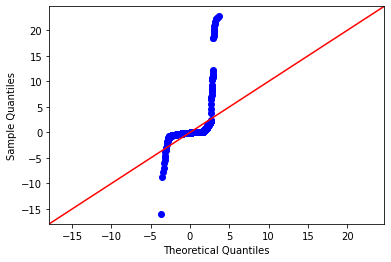

In [19]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## KNeighbors Regression

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

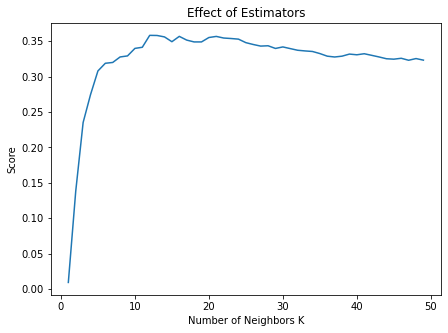

In [22]:
n_neighbors = np.arange(1, 50, 1)
scores = []
for n in n_neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

In [23]:
print("max accuracy is: ", max(scores))
print("K value to achieve this result: ", n_neighbors[scores.index(max(scores))])

max accuracy is:  0.35839378926297905
K value to achieve this result:  12


In [24]:
knn = KNeighborsRegressor(n_neighbors=19)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=19)

In [25]:
accuracy = knn.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 34.91%'

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

In [27]:
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
accuracy = decision_tree.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 10.25%'

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

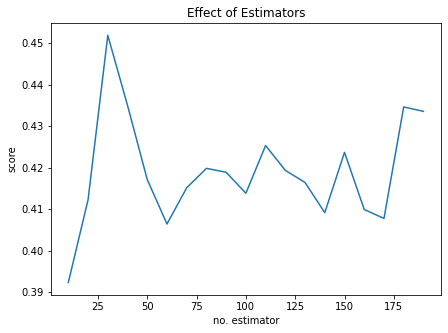

In [30]:
rf = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [31]:
print("max accuracy is: ", max(scores))
print("Estimators to achieve this result: ", estimators[scores.index(max(scores))])

max accuracy is:  0.451894157488384
Estimators to achieve this result:  30


# Outliers

In [ ]:
model_df = df.copy()

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
sns.boxplot(x=model_df['Reviews'])

In [ ]:
def outliers(col, df):
    mean = df[col].mean()
    std = df[col].std()
    cut_off = std * 3
    lower = mean - cut_off
    upper = mean + cut_off
    outliers = [x for x in df[col] if x < lower or x > upper]
    return sorted(outliers)

In [ ]:
outliers('Reviews', model_df)

In [ ]:
model_out = model_df[(model_df['Reviews'] <= 5783441.0) & (model_df['Reviews'] > 10)]
model_out.reset_index(drop=True)

In [ ]:
sns.boxplot(x=model_df['Installs'])

In [ ]:
outliers('Installs', model_out)

In [ ]:
model_out = model_out[(model_out['Installs'] < 500000000) & (model_out['Installs'] >= 10)]
model_out.reset_index(drop=True)

In [ ]:
sns.boxplot(x=model_out['Installs'])

In [ ]:
sns.boxplot(x=model_out['Size'])

In [ ]:
outliers('Size', model_out)

In [ ]:
model_out = model_out[(model_out['Size'] < 120)]
model_out.reset_index(drop=True)

In [ ]:
sns.boxplot(x=model_out['Rating'])

The median looks to be around 4.3. Anything beyond 3.3 and 5 are outliers. We will use these as our markers.

In [ ]:
model_out = model_out[(model_out['Rating'] > 3)]
model_out.reset_index(drop=True)

In [ ]:
model_out.describe()

In [ ]:
model_out.info()

# Model - Outliers Fixed

In [ ]:
outcome = 'Installs'
predictors = model_out.drop(labels=['Installs'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, model_out).fit()
# print(f'List of predictors: {pred_sum}')
# display(model.summary())

In [ ]:
y = model_out['Installs']
X = model_out.drop(labels=['Installs'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
accuracy = linreg.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

In [ ]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## KNeighbors Regression

In [ ]:
n_neighbors = np.arange(1, 100, 10)
scores = []
for n in n_neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

In [ ]:
print("max accuracy is: ", max(scores))
print("K value to achieve this result: ", n_neighbors[scores.index(max(scores))])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=70)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)

In [ ]:
accuracy = decision_tree.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
estimators = np.arange(10, 150, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
print("max accuracy is: ", max(scores))
print("Estimators to achieve this result: ", estimators[scores.index(max(scores))])

# Transform

In [ ]:
df_log = model_out.copy()

In [ ]:
df_log

In [ ]:
df_log[['Rating', 'Reviews', 'Size', 'Installs']].hist(figsize=(15,12));

All the continuous variable are very skewed. Major outliers with Reviews and Installs. 

In [ ]:
df_log['log_Rating'] = np.log(df_log['Rating'])
df_log[['Rating', 'log_Rating']].hist(figsize=(12,5));

df_log['log_Reviews'] = np.log(df_log['Reviews'])
df_log[['Reviews', 'log_Reviews']].hist(figsize=(12,5));

df_log['log_Size'] = np.log(df_log['Size'])
df_log[['Size', 'log_Size']].hist(figsize=(12,5));

df_log['log_Installs'] = np.log(df_log['Installs'])
df_log[['Installs', 'log_Installs']].hist(figsize=(12,5));

In [ ]:
def normalize(feature):
    return round((feature - feature.mean()) / feature.std(), 4)

In [ ]:
# df_log_norm = df_log[['log_Rating']]
df_log_norm = df_log[['log_Rating', 'log_Installs', 'log_Size', 'log_Reviews']]

In [ ]:
df_log_norm = df_log_norm.apply(normalize)
df_log_norm.hist(figsize=(10,10));

In [ ]:
df_log['Rating'] = df_log_norm['log_Rating']
df_log['log_Installs'] = df_log_norm['log_Installs']
df_log['log_Size'] = df_log_norm['log_Size']
df_log['log_Reviews'] = df_log_norm['log_Reviews']

In [ ]:
df_log.info()

In [ ]:
df_log = df_log.drop(['Rating', 'Reviews', 'Installs', 'Size'], axis=1)

# Model - Variables Transformed

## Linear Regression

In [ ]:
y = df_log['log_Installs']
X = df_log.drop(['log_Installs'], axis =1)

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [ ]:
outcome = 'log_Installs'
predictors = df_log.drop(labels=['log_Installs'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, df_log).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
accuracy = linreg.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

In [ ]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## KNeighbors Regression

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

In [ ]:
n_neighbors = np.arange(20, 300, 10)
scores = []
for n in n_neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

In [ ]:
print("max accuracy is: ", max(scores))
print("K value to achieve this result: ", n_neighbors[scores.index(max(scores))])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)

In [ ]:
accuracy = decision_tree.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
estimators = np.arange(10, 150, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
print("max accuracy is: ", max(scores))
print("Estimators to achieve this result: ", estimators[scores.index(max(scores))])